# MNIST MLP

Use a Multi-layer Perceptron to the classify MNIST dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7)

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils

2023-04-26 20:21:38.569771: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 20:21:38.723065: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-26 20:21:39.309587: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-26 20:21:39.309623: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

## Load MNIST data

Keras comes with the MNIST data loader. Keras has a function `mnist.load_data()` which downloads the data from its servers if it is not present already. The data loaded using this function is divided into training and test sets.

In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


The data consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28x28 grayscale image. Let's look at some examples of the training data

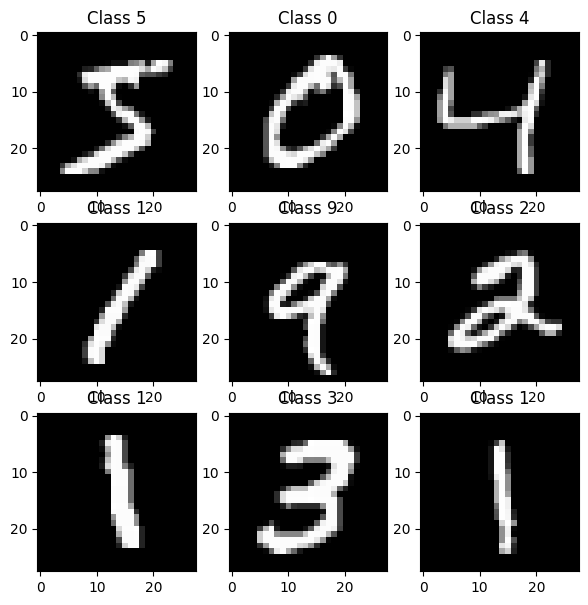

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [10]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.

In [6]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=784)) # input layer
model.add(Dense(units=32, activation='relu')) # hidden layer
model.add(Dense(units=10, activation='softmax')) # output layer

## Visualize the network

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


## Compile the model
Keras is using TensorFlow as a backend. 

When compiling a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical crossentropy*, and is a loss function well-suited to comparing two probability distributions.

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

## Train Model
Feed the training data loaded in earlier into this model and it will learn to classify digits

In [11]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20


2023-04-26 20:23:33.371490: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f454ba26820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-26 20:23:33.371512: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2023-04-26 20:23:33.381097: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-26 20:23:33.480257: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-26 20:23:33.513862: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 2s 1ms/step - loss: 0.4163 - val_loss: 0.2204
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.1850 - val_loss: 0.1591
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.1431 - val_loss: 0.1343
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.1182 - val_loss: 0.1204
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0988 - val_loss: 0.1115
Epoch 6/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0851 - val_loss: 0.1067
Epoch 7/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0724 - val_loss: 0.0996
Epoch 8/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0632 - val_loss: 0.0945
Epoch 9/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0561 - val_loss: 0.0940
Epoch 10/20
469/469 [==============================] - 1s 1ms/step - loss: 0.0491 - val_loss: 0.0920
Epoch 11/2

## Evaluate performance

In [12]:
score = model.evaluate(X_test, Y_test,verbose=1)

print('Test loss:', score)

313/313 [==============================] - 0s 829us/step - loss: 0.1082
Test loss: 0.10823796689510345


## Plot the loss curve

Text(0.5, 1.0, 'Loss Curves')

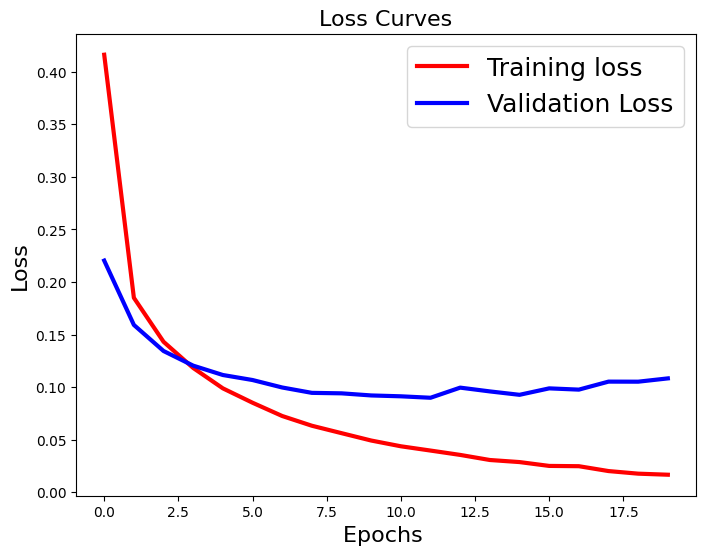

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

## Inspect the output

Inspect the output and look at some examples it gets right, and some examples it gets wrong. The predict_classes function outputs the highest probability class according to the trained classifier for each input example.

In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1)
print(predicted_classes)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

#print(correct_indices)
#print(incorrect_indices)

In [ ]:
#some of the correct results
plt.figure(figsize=(10,10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
#some of the incorrect predictions
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))